In [175]:
# import packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter
#from wordcloud import WordCloud, STOPWORDS





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ab3245\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ab3245\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ab3245\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
# Set the working directory
new_wd = r"C:\Users\ab3245\OneDrive - CCSU"
os.chdir(new_wd)

C:\Users\ab3245\OneDrive - CCSU


In [15]:
# read the CSV file
original_df = pd.read_csv("Ulta_skincare_reviews.csv")


In [178]:
# Color scheme for visualizations

colors = ['#d56974', '#b288d1', '#d7d24a', '#cfd9f7', '#4ebfae']
#sns.set_palette(sns.color_palette(colors), desat=0.6)
#sns.set_style('darkgrid', {'axes.linewidth': 2, 'axes.edgecolor': 'black'})  # sets border
#sns.set_style('darkgrid', {'axes.linewidth': 2, 'axes.edgecolor': 'black'})  # sets style
#plt.rcParams['figure.figsize'] = [8, 6]  # figure size


In [31]:
# create copy of original df
df = original_df.copy()

In [ ]:
# shape of data 
print(df.shape)

In [32]:
# Check for duplicates
print(df.duplicated().sum())

456


In [33]:
# Count the number of duplicated records of just 'Review_Text'
num_duplicates = df.duplicated(subset=['Review_Text']).sum()
print(f'Total number of duplicates of Review_Text: {num_duplicates}')


Total number of duplicates of Review_Text: 489


In [23]:
# identify exact duplicate records
exact_duplicate_mask = df.duplicated(keep=False)
exact_duplicate_records = df[exact_duplicate_mask]
print(exact_duplicate_records[:100])
print(df.duplicated().sum())

                        Review_Title  \
705                          Buy it!   
706                  Amazing product   
707  Would absolutely buy this again   
708                   It's hydrating   
709                   Love this mask   
..                               ...   
800                          Buy it!   
801                  Amazing product   
802  Would absolutely buy this again   
803                   It's hydrating   
804                   Love this mask   

                                           Review_Text Verified_Buyer  \
705                    Works great for all skin types!             No   
706  This product leaves your skin looking smooth a...             No   
707  This product is wonderful! Some masks you have...             No   
708  I've used this product a few times and I haven...             No   
709  I just used my fingers and rubbed mask on clea...             No   
..                                                 ...            ...   
800     

In [34]:
# Exploratory Data Analysis
print(df.head()) 

                      Review_Title  \
0                          Perfect   
1                    You need this   
2                       Clean skin   
3                 Love This Stuff!   
4  This exfoliates very nicely and   

                                         Review_Text Verified_Buyer  \
0  Love using this on my face while in the shower...             No   
1  Even better than the daily microfoliant. I'm o...             No   
2  Enjoy this product so much ! I look forward to...             No   
3  I've never tried anything like this before and...             No   
4  This exfoliates very nicely and gives a very s...             No   

    Review_Date Review_Location  Review_Upvotes  Review_Downvotes  \
0   15 days ago     Undisclosed               0                 0   
1   27 days ago     Undisclosed               0                 0   
2  2 months ago     Undisclosed               0                 0   
3  2 months ago     Undisclosed               0                 0   

In [35]:
# check for missing values in each column
missing = df.isnull().sum()
print(missing)

# with only 4 rows with missing data, making up less than 0.09% of the data,
# removing these variables will not present any systematic differences in the analysis

# remove rows with missing data
df = df.dropna()

Review_Title        0
Review_Text         3
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64


In [25]:
# summary statistics: numeric variables
df.describe()

,Review_Upvotes,Review_Downvotes
count,4150.000000,4150.000000
mean,0.591325,0.161205
std,2.210041,0.912561
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,84.000000,35.000000


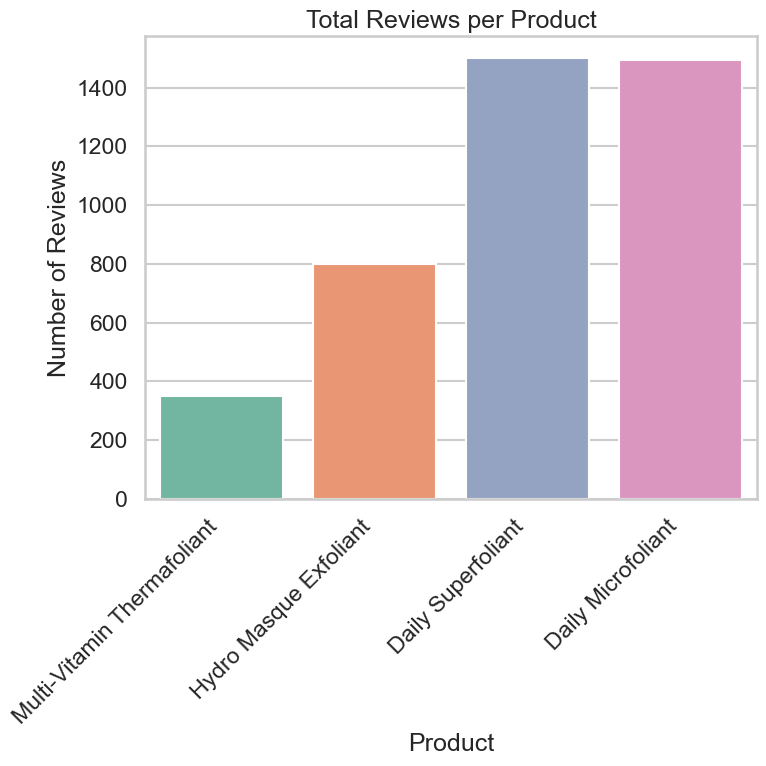

In [37]:
# Create an ID column
df.reset_index(inplace=True)
df.rename(columns={'index': 'ID'}, inplace=True)
print(df.shape)


(4146, 11)


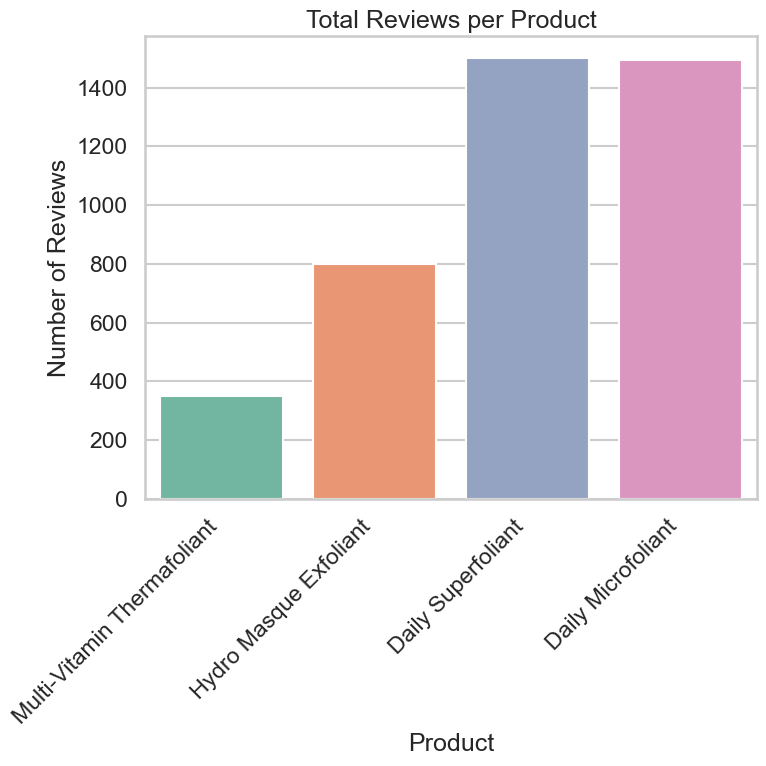

In [212]:
# Distribution of reviews

# Assuming 'df' is the DataFrame with a column 'Product' and 'Review_Text'
products = df['Product'].unique()

# Set Seaborn style and context for better aesthetics
sns.set(style="whitegrid")
sns.set_context("talk")

# Create a bar chart for total reviews per product with Set2 colors
plt.figure(figsize=(8, 8))
sns.countplot(x='Product', data=df, palette="Set2")

# Set the x and y axis labels
plt.title('Total Reviews per Product')
plt.xlabel('Product')
plt.ylabel('Number of Reviews')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


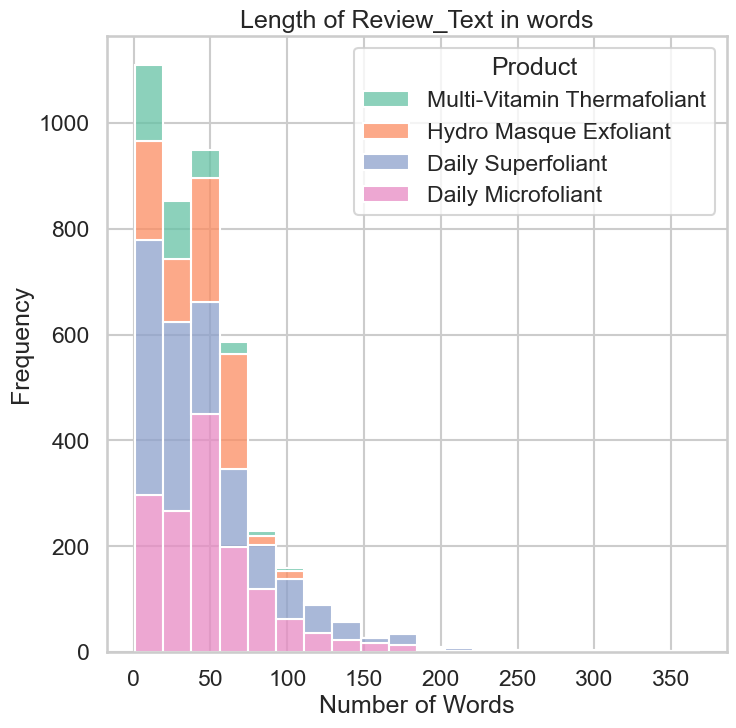

In [230]:
# Exploring distribution of length of reviews (total words)

# Split the review_text column into words and count the number of words
df['Review_Length'] = df['Review_Text'].apply(lambda x: len(x.split()))

# Group the df by product and review length and count the number of reviews
grouped_df = df.groupby(['Product', 'Review_Length'])['Review_Text'].count().reset_index()

# Pivot the DataFrame so each product is a column
pivoted_df = grouped_df.pivot(index='Review_Length', columns='Product', values='Review_Text')

# Assuming 'df' is the DataFrame with a column 'Review_Length' and 'Product'
products = df['Product'].unique()

# Set Seaborn style and context for better aesthetics
sns.set(style="whitegrid")
sns.set_context("talk")

# Use Seaborn's 'Set2' color palette
sns.set_palette("Set2")

# Plot a histogram for each product using Seaborn
plt.figure(figsize=(8, 8))
sns.histplot(data=df, x='Review_Length', hue='Product', bins=20, multiple='stack')
  
# Set the x and y axis labels
plt.title('Length of Review_Text in words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


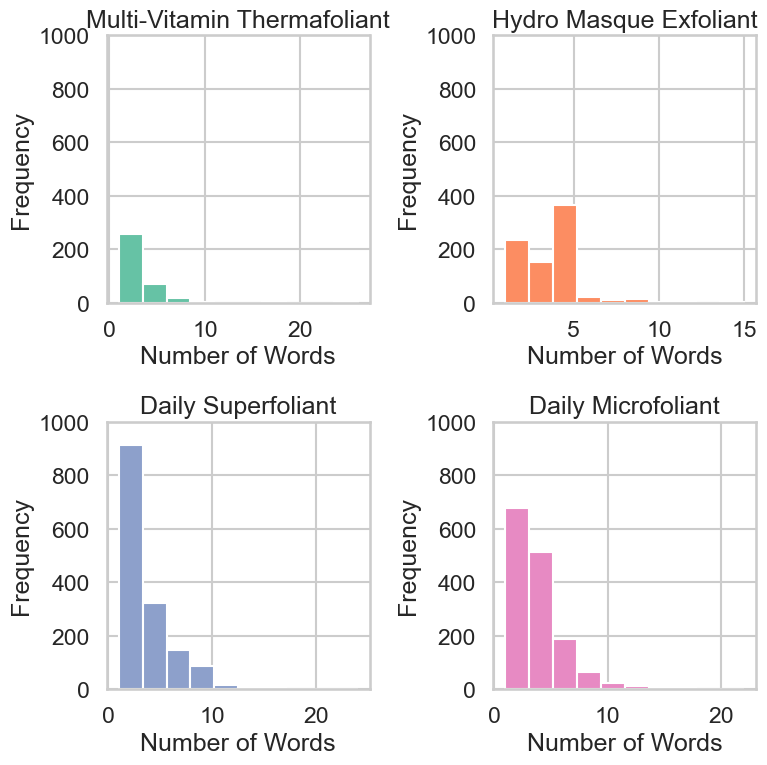

In [229]:
# Distribution of words per review per product

# Assuming 'df' is the DataFrame with a column 'Review_Length' and 'Product'
products = df['Product'].unique()

# Set Seaborn style and context for better aesthetics
sns.set(style="whitegrid")
sns.set_context("talk")

# Determine the common y-axis limits based on the data
min_length = float('inf')
max_length = 0
for i, product in enumerate(products):
    product_df = df[df['Product'] == product]
    min_length = min(min_length, product_df['Review_Length'].min())
    max_length = max(max_length, product_df['Review_Length'].max())

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Plot a histogram for each product on a different subplot with Set2 colors
for i, product in enumerate(products):
    row = i // 2
    col = i % 2
    product_df = df[df['Product'] == product]
    color = sns.color_palette("Set2")[i]
    axs[row, col].hist(product_df['Review_Length'], color=color)
    axs[row, col].set_title(product)
    axs[row, col].set_xlabel('Number of Words')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_ylim(0, 1000)  # Set y-axis limits to 400

fig.tight_layout()

# Show the plot
plt.show()


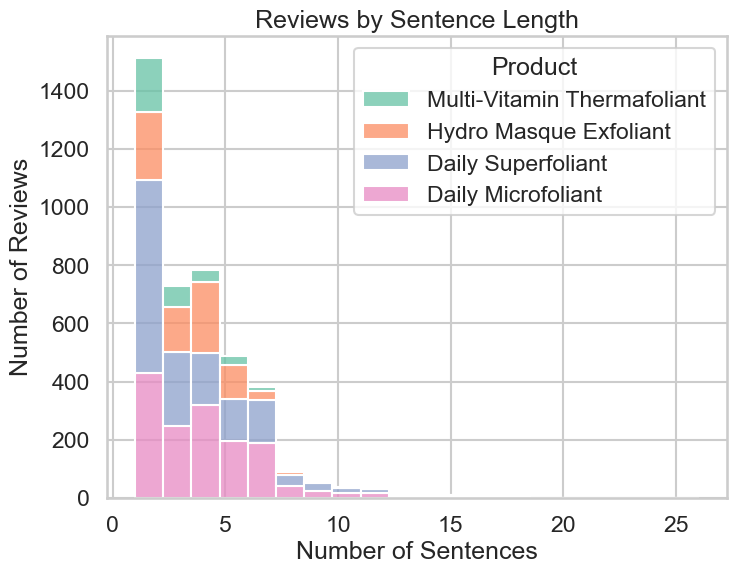

In [217]:
# Distribution of sentences

# Set Seaborn style and context for better aesthetics
sns.set(style="whitegrid")
sns.set_context("talk")

# Plot a histogram of the number of reviews by length in sentences for each product with Set2 colors
ax = sns.histplot(data=df, x='num_sentences', hue='Product', multiple='stack', palette='Set2', bins=20)

# Set the x and y axis labels
plt.title('Reviews by Sentence Length')
plt.xlabel('Number of Sentences')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()


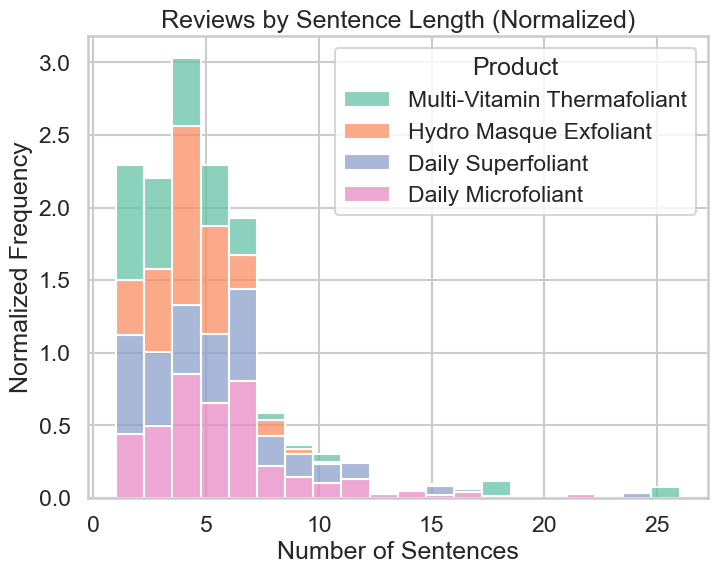

In [218]:
# Distribution of sentences (normalized)

# Calculate the total number of reviews for each product
total_reviews_per_product = df.groupby('Product')['Review_Text'].count()

# Normalize the counts by dividing by the total number of reviews per product
df['normalized_num_sentences'] = df['num_sentences'] / df['Product'].map(total_reviews_per_product)

# Set Seaborn style and context for better aesthetics
sns.set(style="whitegrid")
sns.set_context("talk")

# Plot a histogram of the normalized number of sentences for each product with Set2 colors
ax = sns.histplot(data=df, x='num_sentences', hue='Product', weights='normalized_num_sentences', multiple='stack', palette='Set2', bins=20)

# Set the x and y axis labels
plt.title('Reviews by Sentence Length (Normalized)')
plt.xlabel('Number of Sentences')
plt.ylabel('Normalized Frequency')

# Show the plot
plt.show()


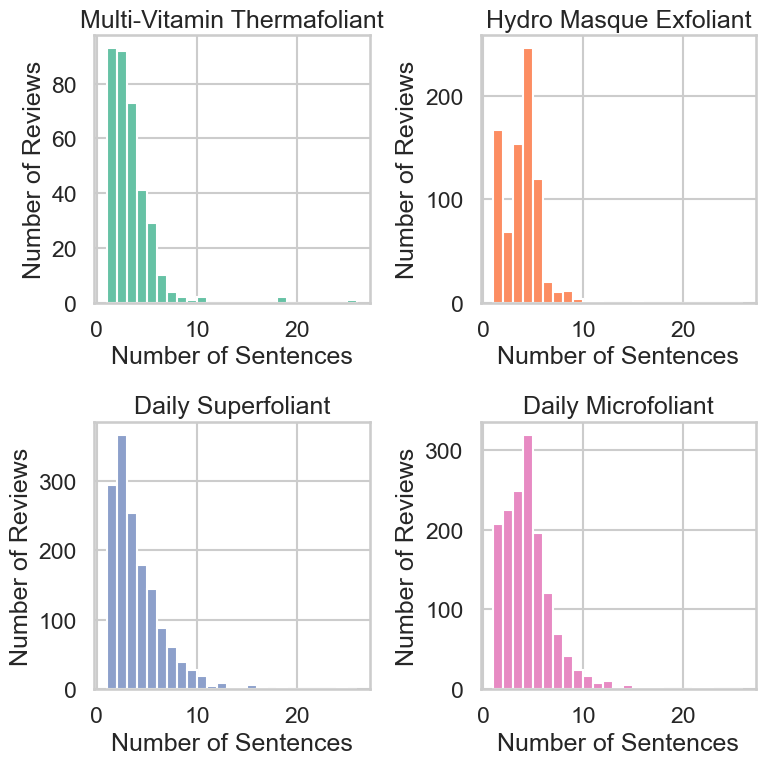

In [228]:
# Distribution of sentences per product

products = df['Product'].unique()

# Set Seaborn style and context for better aesthetics
sns.set(style="whitegrid")
sns.set_palette("Set2")
sns.set_context("talk")

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Plot a histogram for each product on a different subplot with different color from Set2 palette
for i, (product, color) in enumerate(zip(products, sns.color_palette("Set2", n_colors=len(products)))):
    row = i // 2
    col = i % 2
    product_df = df[df['Product'] == product]
    axs[row, col].hist(product_df['Review_Length'], bins=25, range=(min_sentences, max_sentences), color=color)
    axs[row, col].set_title(product)
    axs[row, col].set_xlabel('Number of Sentences')
    axs[row, col].set_ylabel('Number of Reviews')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [42]:
# Prep for sentiment analysis/bigram extraction/wordclouds

# define function to clean text
def clean_text(text):
    # check if the input text is a string
    if isinstance(text, str):
        
        # convert to lowercase
        text = text.lower()
      
        # replace contractions with expanded forms
        text = re.sub(r"\'s", " is", text)
        text = re.sub(r"\'m", " am", text)
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"n\'t", " not", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ll", " will", text)
       
        # remove non-alphanumeric characters
        text = re.sub(r'[^\w\s]', ' ', text)
        # remove digits
        text = re.sub(r'\d+', ' ', text)
        
        # remove stopwords
        stop_words = set(stopwords.words('english'))
        stop_words.update(['really', 'use', 'using', 'face', 'one', 'used', 'skin', 'product', 'dermalogica', 'daily', 'microfoliant', 'superfoliant', 'thermafoliant' ]) #not helpful words
        
        # tokenize text
        text_tokens = nltk.word_tokenize(text)
        tokens_without_sw = [word for word in text_tokens if word.lower() not in stop_words]
        
        # lemmatize words
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens_without_sw]
        # join tokens back into a string
        clean_text = ' '.join(lemmatized_tokens)
        return clean_text
    else:
        return ''

In [43]:
# Assess the results of clean_text
sample_reviews = df['Review_Text'].sample(n=10)
cleaned_reviews = sample_reviews.apply(clean_text)

In [44]:
# Print the original and cleaned reviews for comparison
for i in range(len(sample_reviews)):
    print('Original Review:\n', sample_reviews.iloc[i])
    print('Cleaned Review:\n', cleaned_reviews.iloc[i])
    print('----------------------------------------\n')


Original Review:
 I use together with the Skin Resurfacing Cleanser. Wow. What a wiz bang combo! Skin is so smooth afterwards! Highly recommend!
Cleaned Review:
 together resurfacing cleanser wow wiz bang combo smooth afterwards highly recommend
----------------------------------------

Original Review:
 I love Dermalogica products so I was very happy to receive this product complimentary for testing and review purposes. I am a mask fanatic. No joke. If it is out there I will probably try it. 😆 Especially if it happens to be a product from one of my favorite brands. This is a multi tasking skincare product. While it polishes away dead skin cells it also hydrates at the same time. Great for those who needs both exfoliation and hydration. Hello people with dry chin skin. This product is for YOU. It smells really good and didn't cause any irritation what-so-ever. I have been using the product for about a month a couple of times per week and really enjoy it. Highly recommend. Also, it has 

In [45]:
# create a new variable to represent cleaned text
df['clean_review_text'] = df['Review_Text'].apply(clean_text)

In [46]:
# examine nltk stop words
SW = nltk.corpus.stopwords.words('english')
print(SW, len(SW)) # note the punctuation

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [99]:
# RawText for reference
print(len(df['Review_Text']))

4146


In [102]:
# Exploring upvotes

df["Review_Upvotes"] = df["Review_Upvotes"].astype(int)

# calculate summary statistics
stats = df['Review_Upvotes'].describe()

# format table
table = []
for key, value in stats.items():
    table.append([key.capitalize(), value])

# print table
print(tabulate(table, headers=['Statistic', 'Value'], tablefmt='pipe'))


| Statistic   |       Value |
|:------------|------------:|
| Count       | 4146        |
| Mean        |    0.591413 |
| Std         |    2.21094  |
| Min         |    0        |
| 25%         |    0        |
| 50%         |    0        |
| 75%         |    0        |
| Max         |   84        |


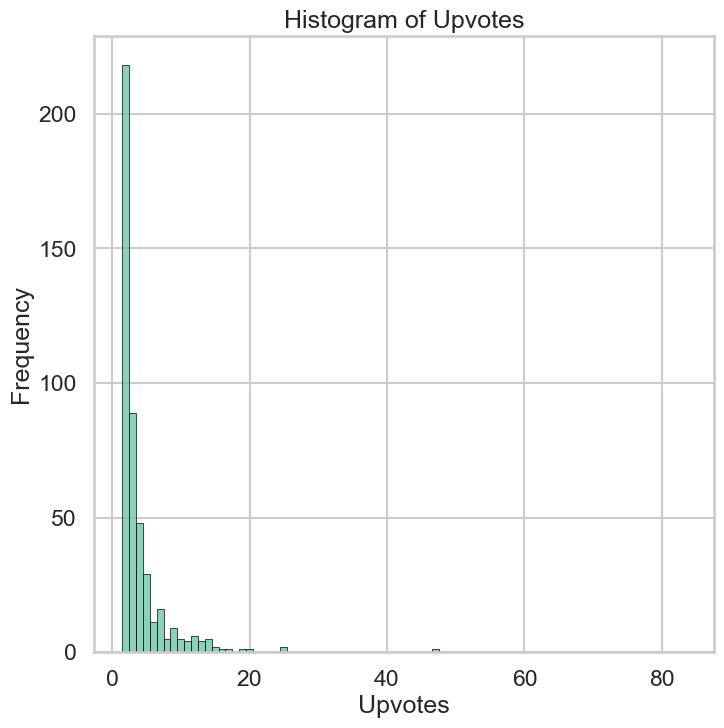

In [234]:
# distribution of upvotes
# Assuming 'df' is the DataFrame with a column 'Review_Upvotes'
df['Review_Upvotes'] = df['Review_Upvotes'].astype(str)
df['upvotes'] = df['Review_Upvotes'].str.extract(r'^(\d+)')
df['upvotes'] = pd.to_numeric(df['upvotes'])

# Set Seaborn style and context
sns.set(style="whitegrid")
sns.set_palette("Set2")
sns.set_context("talk")

# Plot the histogram
plt.figure(figsize=(8, 8))
sns.histplot(df['upvotes'], kde=False, bins=[i + 0.5 for i in range(1, 84)], edgecolor='black')

# Set the axis labels and title
plt.xlabel('Upvotes')
plt.ylabel('Frequency')
plt.title('Histogram of Upvotes')

# Show the plot
plt.show()


In [111]:
# Exploring reviews with most upvotes (all products)

# change to intger for sorting
df["Review_Upvotes"] = df["Review_Upvotes"].astype(int)

# sort df by number of upvotes
sorted_df = df.sort_values(by='upvotes', ascending=False)

# get the first 10 comments with the most upvotes
top_comments = sorted_df.head(10)

# print the ID, comment, and number of upvotes for each top comment
for index, row in top_comments.iterrows():
    print(f"ID: {row['ID']}\nComment: {row['Review_Text']}\nNumber of Upvotes: {row['upvotes']}\n")


ID: 3381
Comment: For those curious, this is a .14 ounce size. That's about it a third of the travel size, which is .45 ounces and $15. So, a value of less than $5. I appreciate the gift, just wanted people to know what the actual size is. I should have just gotten the Lancôme mask online.
Number of Upvotes: 84

ID: 3374
Comment: So this is a comically small amount of product. I wish I would have chosen the mask. Photo is extremely misleading.
Number of Upvotes: 47

ID: 1518
Comment: I was struggling with random breakouts and a weird redness that would only be around my nostrils. I found that every time I wore makeup I broke out the next day. I was using the daily microfolient, the original and I thought I would give this a try. And when I did I shiz you not, any problem I was having with my skin disappeared within a couple of uses. I no longer break out after wearing my makeup and the redness around my nostrils is gone! I use this product every day. I highly recommend!
Number of Upvot

In [112]:
# Assess top upvoted comments by product

# group df by product
grouped_df = df.groupby('Product')

# Loop through each group and get the top 3 comments
for name, group in grouped_df:
    print(f"Product: {name}")
    top_comments = group.sort_values(by='Review_Upvotes', ascending=False).head(3)
    for index, row in top_comments.iterrows():
        print(f"ID: {row['ID']}\nComment: {row['Review_Text']}\nNumber of Upvotes: {row['Review_Upvotes']}\n")


max_upvotes_index = df["Review_Upvotes"].idxmax()
print(df.loc[max_upvotes_index, "Review_Text"])

Product: Daily Microfoliant
ID: 3381
Comment: For those curious, this is a .14 ounce size. That's about it a third of the travel size, which is .45 ounces and $15. So, a value of less than $5. I appreciate the gift, just wanted people to know what the actual size is. I should have just gotten the Lancôme mask online.
Number of Upvotes: 84

ID: 3374
Comment: So this is a comically small amount of product. I wish I would have chosen the mask. Photo is extremely misleading.
Number of Upvotes: 47

ID: 3367
Comment: For as much as I spend at Ulta in a year, I would think the birthday gift would be a little......more substantial?
Number of Upvotes: 25

Product: Daily Superfoliant
ID: 1518
Comment: I was struggling with random breakouts and a weird redness that would only be around my nostrils. I found that every time I wore makeup I broke out the next day. I was using the daily microfolient, the original and I thought I would give this a try. And when I did I shiz you not, any problem I was 

In [119]:
# Define a function for extracting bigrams 

def get_bigrams(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    
    # Create bigrams from the words
    bigrams = []
    for i in range(len(tokens) - 1):
        bigram = (tokens[i], tokens[i+1])
        bigrams.append(bigram)
        
    # Count the frequency of each bigram
    bigram_counts = Counter(bigrams)
    
    return bigram_counts


In [120]:
# Assess bigrams of all upvoted reviews

# filter the dataframe to only include rows with non-zero Review_Downvotes values
filtered_upvotes = df.loc[df['Review_Upvotes'] != 0]

# sort the filtered DataFrame by number of votes
sorted_upvotes = filtered_upvotes.sort_values(by='Review_Upvotes', ascending=False)

# Concatenate the top comments into a single string
top_comments_upvotes = ' '.join(sorted_upvotes['clean_review_text'].tolist())

# Call get_bigrams to get the Counter object of bigrams
bigram_upvotes = get_bigrams(top_comments_upvotes)

# Get the top 10 bigrams using the most_common method
top_bigram_upvotes= bigram_upvotes.most_common(15)

# Loop through the top bigrams and print them
for bigram, count in top_bigram_upvotes:
    print(bigram, count)
# add 'face' and 'leaves' to stopwords


('every', 'day') 69
('essential', 'cleansing') 58
('cleansing', 'solution') 58
('feel', 'like') 53
('time', 'week') 49
('leaf', 'feeling') 41
('make', 'feel') 41
('highly', 'recommend') 36
('long', 'time') 32
('long', 'way') 31
('soft', 'smooth') 31
('travel', 'size') 30
('gentle', 'enough') 29
('go', 'long') 28
('acne', 'prone') 27


In [118]:
# Asess bigrams of all downvoted reviews

# filter the dataframe to only include rows with non-zero Review_Downvotes values
filtered_upvotes = df.loc[df['Review_Downvotes'] != 0]

# sort the filtered DataFrame by number of votes
sorted_upvotes = filtered_upvotes.sort_values(by='Review_Downvotes', ascending=False)

# Concatenate the top comments into a single string
top_comments_upvotes = ' '.join(sorted_upvotes['clean_review_text'].tolist())

# Call get_bigrams to get the Counter object of bigrams
bigram_upvotes = get_bigrams(top_comments_upvotes)

# Get the top 10 bigrams using the most_common method
top_bigram_upvotes= bigram_upvotes.most_common(15)
       
# Loop through the top bigrams and print them
for bigram, count in top_bigram_upvotes:
    print(bigram, count)


('feel', 'like') 20
('every', 'day') 19
('essential', 'cleansing') 17
('cleansing', 'solution') 17
('time', 'week') 16
('leaf', 'feeling') 12
('travel', 'size') 10
('long', 'way') 10
('love', 'love') 10
('acne', 'prone') 9
('smell', 'like') 9
('long', 'time') 9
('little', 'go') 9
('go', 'long') 9
('highly', 'recommend') 8


In [128]:
# Top 15 bigrams for each product

# Redefine a function to get bigrams from text
def get_bigrams(text):
    tokens = word_tokenize(text)
    return list(bigrams(tokens))

# Define a function to get the top 15 bigrams for a given DataFrame
def get_top_bigrams(df):
    # Concatenate the clean review texts into a single string
    comments = ' '.join(df['clean_review_text'].tolist())

    # Call get_bigrams to get the list of bigrams
    bigram_list = get_bigrams(comments)

    # Create a Counter object for bigrams
    bigram_counter = pd.Series(bigram_list).value_counts()

    # Get the first 15 bigrams with their counts
    top_bigrams = bigram_counter.head(15).items()

    return top_bigrams

# Group the DataFrame by product and apply the get_top_bigrams function to each group
top_bigrams_by_product = df.groupby('Product').apply(get_top_bigrams)

# Loop through the top 15 bigrams for each product and print them with counts
for product, top_bigrams in top_bigrams_by_product.items():
    print('\nProduct:', product)
    for bigram, count in top_bigrams:
        print(f'{bigram} {count}')



Product: Daily Microfoliant
('every', 'day') 111
('gentle', 'enough') 86
('make', 'feel') 79
('highly', 'recommend') 75
('leaf', 'feeling') 65
('time', 'week') 61
('feel', 'like') 61
('feel', 'soft') 59
('acne', 'prone') 54
('soft', 'smooth') 52
('smooth', 'soft') 48
('travel', 'size') 45
('absolutely', 'love') 45
('long', 'way') 45
('long', 'time') 43

Product: Daily Superfoliant
('leaf', 'feeling') 109
('every', 'day') 93
('make', 'feel') 73
('intensive', 'moisture') 69
('moisture', 'cleanser') 69
('essential', 'cleansing') 60
('cleansing', 'solution') 60
('received', 'free') 54
('feel', 'clean') 54
('feel', 'like') 53
('soft', 'smooth') 52
('highly', 'recommend') 44
('would', 'recommend') 42
('first', 'time') 42
('absolutely', 'love') 40

Product: Hydro Masque Exfoliant
('take', 'minute') 181
('finger', 'rubbed') 178
('make', 'feel') 107
('leaf', 'feeling') 106
('left', 'feeling') 97
('definitely', 'recommend') 97
('would', 'definitely') 96
('work', 'great') 96
('soft', 'smooth') 9

In [158]:
# sentiment analysis: TextBlob
# sentiment polarity score ranges from -1 (most negative) to 1 (most positive)
!pip install textblob
from textblob import TextBlob


# define function 
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Using the polarity score as an overall sentiment indicator

# Assuming 'df' is the DataFrame with a column 'Review_Text' and 'Product'
df['Sentiment_Score_TextBlob'] = df['clean_review_text'].apply(analyze_sentiment)


# Group by product and calculate the average sentiment score for each product
sentiment_by_product_textblob = df.groupby('Product')['Sentiment_Score_TextBlob'].mean()

# Display the results
print(sentiment_by_product_textblob)



Product
Daily Microfoliant             0.247555
Daily Superfoliant             0.275632
Hydro Masque Exfoliant         0.323185
Multi-Vitamin Thermafoliant    0.319522
Name: Sentiment_Score_TextBlob, dtype: float64


In [224]:
# sentiment analysis: nltk VADER

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# Function to analyze sentiment using NLTK's SentimentIntensityAnalyzer
def analyze_sentiment_vader(text):
    sentiment_score = sid.polarity_scores(text)['compound']
    return 'positive' if sentiment_score >= 0 else 'negative', sentiment_score

# Assuming 'df' is the DataFrame with a column 'clean_review_text' and 'Product'
df['Sentiment_Score_VADER'] = df['clean_review_text'].apply(analyze_sentiment_vader)

# Separate sentiment score and sentiment label into two columns
df[['Sentiment_Label_VADER', 'Sentiment_Score_VADER']] = df['Sentiment_Score_VADER'].apply(pd.Series)

# Function to analyze sentiment using NLTK's SentimentIntensityAnalyzer
def analyze_sentiment_nltk(text):
    sentiment_score = sid.polarity_scores(text)['compound']
    return 'positive' if sentiment_score >= 0 else 'negative'


# Group by product and calculate the average sentiment score, count of positive, and count of negative sentiments for each product
sentiment_by_product = df.groupby('Product').agg({
    'Sentiment_Score_VADER': 'mean',
    'Sentiment_Label_VADER': lambda x: (x == 'positive').sum(),
    'Sentiment_Label_VADER': lambda x: (x == 'negative').sum()
    
})

# Group by product and calculate the count of positive and negative sentiments for each product
sentiment_by_product_nltk = df.groupby(['Product', 'Sentiment_Score_NLTK']).size().unstack(fill_value=0)

# Display the results
print(sentiment_by_product_nltk)

# Display the results
print(sentiment_by_product)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ab3245\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment_Score_NLTK         negative  positive
Product                                        
Daily Microfoliant                 80      1416
Daily Superfoliant                 80      1420
Hydro Masque Exfoliant             20       780
Multi-Vitamin Thermafoliant        19       331
                             Sentiment_Score_VADER  Sentiment_Label_VADER
Product                                                                  
Daily Microfoliant                        0.671844                     80
Daily Superfoliant                        0.655325                     80
Hydro Masque Exfoliant                    0.656222                     20
Multi-Vitamin Thermafoliant               0.595984                     19


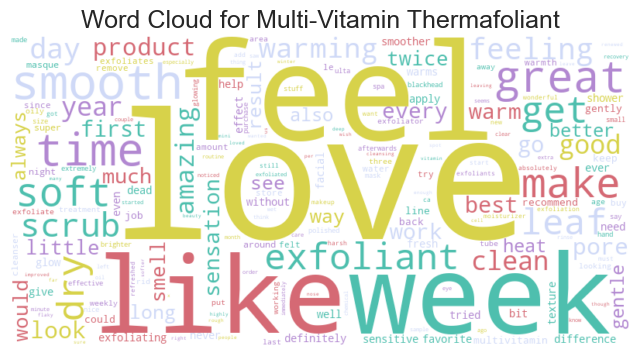

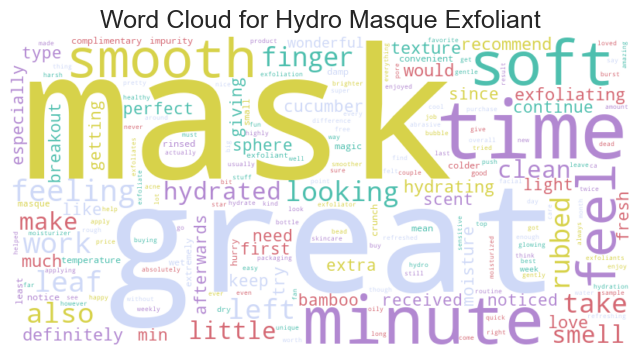

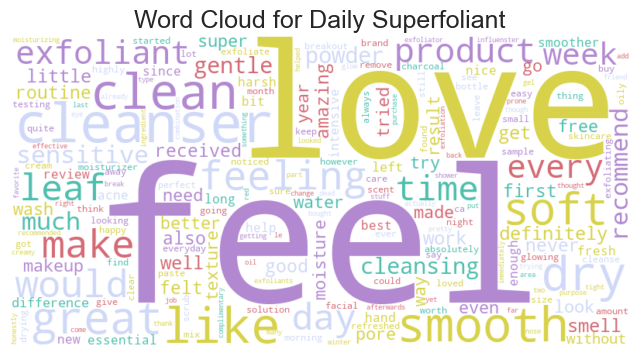

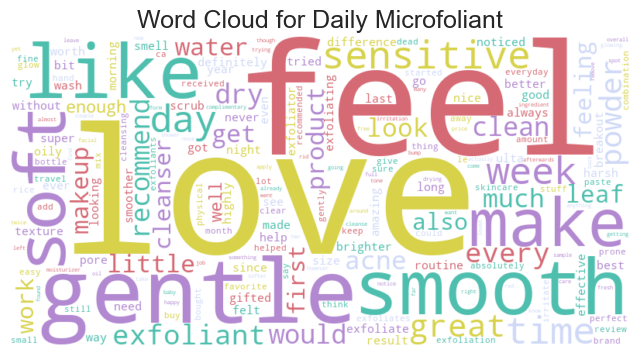

In [227]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import random

# Assuming 'df' is the DataFrame with a column 'clean_review_text' and 'Product'
products = df['Product'].unique()

# Define a color palette (replace this with your desired colors)

colors = ['#d56974', '#b288d1', '#d7d24a', '#cfd9f7', '#4ebfae']


# Generate word clouds for each product
for i, product in enumerate(products):
    product_df = df[df['Product'] == product]
    
    # Concatenate the clean review texts into a single string
    reviews_text = ' '.join(product_df['clean_review_text'].tolist())
    
    # Calculate word frequencies
    word_freq = Counter(reviews_text.split())
    
    # Custom color function
    def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
        return random.choice(colors)
    
    # Generate WordCloud with the specified color palette
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=random_color_func).generate_from_frequencies(word_freq)
    
    # Plot the WordCloud
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {product}')
    plt.axis('off')
    plt.show()


In [236]:
# Topic Modeling using LDA and count vectorization

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

products = df['Product'].unique()

# Number of topics per product
num_topics_per_product = 3

for product in products:
    product_df = df[df['Product'] == product]

    # Vectorize the text data
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    X = vectorizer.fit_transform(product_df['clean_review_text'])

    # Fit LDA model
    lda = LatentDirichletAllocation(n_components=num_topics_per_product, random_state=42)
    lda.fit(X)

    # Display the top words for each topic
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        top_words_indices = topic.argsort()[:-11:-1]
        top_words = [feature_names[i] for i in top_words_indices]
        print(f"Product: {product}, Topic #{topic_idx + 1}: {', '.join(top_words)}")


Product: Multi-Vitamin Thermafoliant, Topic #1: like, week, make, glow, year, feel, pore, dry, smooth, good
Product: Multi-Vitamin Thermafoliant, Topic #2: love, feel, week, smooth, time, soft, great, leaf, feeling, make
Product: Multi-Vitamin Thermafoliant, Topic #3: love, feel, like, day, dead, great, dry, job, product, difference
Product: Hydro Masque Exfoliant, Topic #1: minute, great, time, soft, perfect, make, mask, feel, work, breakout
Product: Hydro Masque Exfoliant, Topic #2: mask, feeling, leaf, left, great, smooth, looking, time, finger, rubbed
Product: Hydro Masque Exfoliant, Topic #3: feel, mask, love, like, masque, dry, week, exfoliant, little, smell
Product: Daily Superfoliant, Topic #1: cleanser, dry, feel, like, moisture, love, makeup, product, clean, year
Product: Daily Superfoliant, Topic #2: received, routine, smell, time, product, free, love, like, cleansing, review
Product: Daily Superfoliant, Topic #3: feel, love, smooth, soft, clean, great, make, leaf, feeling, 

In [240]:
# Topic modeling using LDA and TFIDF vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming 'df' is your DataFrame with a column 'clean_review_text' and 'Product'
products = df['Product'].unique()

# Loop over each product
for product in products:
    # Filter reviews for the current product
    product_df = df[df['Product'] == product]
    documents = product_df['clean_review_text'].tolist()

    # TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')  # Adjust parameters as needed
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

    # Latent Dirichlet Allocation (LDA)
    num_topics = 4 # Adjust the number of topics as needed
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_topics = lda_model.fit_transform(tfidf_matrix)

    # Print the top words in each topic for the current product
    feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[:-10 - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Product: {product}, Topic #{topic_idx + 1}: {', '.join(top_words)}")


Product: Multi-Vitamin Thermafoliant, Topic #1: twice, feel, weekly, awesome, working, week, purchase, smooth, clean, recommend
Product: Multi-Vitamin Thermafoliant, Topic #2: love, feel, smooth, great, soft, week, make, time, leaf, feeling
Product: Multi-Vitamin Thermafoliant, Topic #3: best, thanks, absolutely, new, love, vitamin, product, aspect, like, dead
Product: Multi-Vitamin Thermafoliant, Topic #4: like, work, great, way, love, day, good, glow, little, feel
Product: Hydro Masque Exfoliant, Topic #1: type, great, work, love, like, feel, masque, exfoliant, good, dry
Product: Hydro Masque Exfoliant, Topic #2: mask, left, feeling, finger, rubbed, hydrating, fresh, extra, especially, moisture
Product: Hydro Masque Exfoliant, Topic #3: scent, received, light, cucumber, complimentary, bamboo, hydrated, magic, crunch, convenient
Product: Hydro Masque Exfoliant, Topic #4: minute, perfect, wonderful, make, breakout, small, getting, extremely, impurity, mean
Product: Daily Superfoliant, 